## Demo 2: Hardware architecture comparison

ZigZag provides quick insight into how good/bad an architecture is for running a certain workload, due to its analytical cost model evaluation. This is valuable to architectural designers.

In this demo, we use ZigZag to compare different HW architectures' performance (in terms of energy (pJ) and latency (cycles)) of running AlexNet/MobileNetV2, each with the best temporal mapping found by ZigZag. Four standard-included architectures are used in this demo:

- TPU
- Edge TPU
- Tesla NPU
- Meta Prototype

In [1]:
### Set the inputs

# Get the workload (onnx model)
model = "mobilenetv2"  # uncomment these 3 lines to try the second workload
onnx_model_path = f"{model}.onnx"
workload = onnx_model_path

# Get the accelerators
from zigzag.inputs.examples.hardware.TPU_like import accelerator as tpu
from zigzag.inputs.examples.hardware.Edge_TPU_like import accelerator as edge_tpu
from zigzag.inputs.examples.hardware.Tesla_NPU_like import accelerator as tesla_npu
from zigzag.inputs.examples.hardware.Meta_prototype import accelerator as meta_prototype
accelerators = [tpu, edge_tpu, tesla_npu, meta_prototype]

# Get the mappings
from zigzag.inputs.examples.mapping.tpu_like import mapping as mapping_tpu
from zigzag.inputs.examples.mapping.edge_tpu_like import mapping as mapping_edge_tpu
from zigzag.inputs.examples.mapping.tesla_npu_like import mapping as mapping_tesla_npu
from zigzag.inputs.examples.mapping.meta_prototype_like import mapping as mapping_meta_prototype
mappings = [mapping_tpu, mapping_edge_tpu, mapping_tesla_npu, mapping_meta_prototype]

# Set the filenames
dump_filename_patterns = [f"outputs/Arch_Compare-TPU-{model}-layer_?.json",
                          f"outputs/Arch_Compare-Edge_TPU-{model}-layer_?.json",
                          f"outputs/Arch_Compare-Tesla_NPU-{model}-layer_?.json",
                          f"outputs/Arch_Compare-Meta_prototype-{model}-layer_?.json"]
pickle_filenames = [f"outputs/Arch_Compare-TPU-{model}-saved_list_of_cmes.pickle",
                    f"outputs/Arch_Compare-Edge_TPU-{model}-saved_list_of_cmes.pickle",
                    f"outputs/Arch_Compare-Tesla_NPU-{model}-saved_list_of_cmes.pickle",
                    f"outputs/Arch_Compare-Meta_prototype-{model}-saved_list_of_cmes.pickle"]

In [2]:
### Run

from zigzag.api import get_hardware_performance_zigzag
cmes = []
opt = 'EDP'
for (accelerator, mapping, dump_filename_pattern, pickle_filename) in zip(accelerators, mappings, dump_filename_patterns, pickle_filenames):
    energy, latency, cme = get_hardware_performance_zigzag(workload=workload,
                                                           accelerator=accelerator,
                                                           mapping=mapping,
                                                           opt=opt,
                                                           dump_filename_pattern=dump_filename_pattern,
                                                           pickle_filename=pickle_filename)
    print(f"{str(accelerator)} Overall Performance = ({energy:.3e} pJ, {latency:.3e} cycles).")
    cmes.append(cme[0][0])

2023-02-08 21:29:12,335 - generate_layer_node_for_conv +175 - INFO - Parsed Conv node /features/features.0/features.0.0/Conv
2023-02-08 21:29:12,336 - generate_layer_node_for_conv +175 - INFO - Parsed Conv node /features/features.1/conv/conv.0/conv.0.0/Conv
2023-02-08 21:29:12,337 - generate_layer_node_for_conv +175 - INFO - Parsed Conv node /features/features.1/conv/conv.1/Conv
2023-02-08 21:29:12,338 - generate_layer_node_for_conv +175 - INFO - Parsed Conv node /features/features.2/conv/conv.0/conv.0.0/Conv
2023-02-08 21:29:12,340 - generate_layer_node_for_conv +175 - INFO - Parsed Conv node /features/features.2/conv/conv.1/conv.1.0/Conv
2023-02-08 21:29:12,342 - generate_layer_node_for_conv +175 - INFO - Parsed Conv node /features/features.2/conv/conv.2/Conv
2023-02-08 21:29:12,342 - generate_layer_node_for_conv +175 - INFO - Parsed Conv node /features/features.3/conv/conv.0/conv.0.0/Conv
2023-02-08 21:29:12,344 - generate_layer_node_for_conv +175 - INFO - Parsed Conv node /features

Accelerator(TPU_like) Overall Performance = (1.945e+09 pJ, 2.311e+07 cycles).


100%|██████████| 720/720 [00:01<00:00, 415.64it/s]
2023-02-08 21:30:28,715 - run +44 - INFO - Saved CostModelEvaluation(layer=LayerNode_0, core=1) with energy 5.539e+07 and latency 9.722e+04 to outputs/Arch_Compare-Edge_TPU-mobilenetv2-layer_LayerNode_0.json
2023-02-08 21:30:28,715 - run +33 - INFO - Processing layer /features/features.1/conv/conv.0/conv.0.0/Conv...
2023-02-08 21:30:28,716 - run +81 - INFO - Launching spatial mapping 1/1: {'D1': ('K', 8), 'D2': ('C', 8), 'D3': ('OX', 4), 'D4': ('OY', 4)}.
2023-02-08 21:30:28,717 - run +82 - INFO - Running temporal mapping search engine...
100%|██████████| 720/720 [00:01<00:00, 381.74it/s]
2023-02-08 21:30:30,608 - run +44 - INFO - Saved CostModelEvaluation(layer=LayerNode_4, core=1) with energy 8.144e+07 and latency 3.261e+05 to outputs/Arch_Compare-Edge_TPU-mobilenetv2-layer_LayerNode_4.json
2023-02-08 21:30:30,611 - run +33 - INFO - Processing layer /features/features.1/conv/conv.1/Conv...
2023-02-08 21:30:30,612 - run +81 - INFO - L

Accelerator(Edge_TPU_like) Overall Performance = (1.673e+09 pJ, 3.724e+06 cycles).


100%|██████████| 720/720 [00:01<00:00, 383.18it/s]
2023-02-08 21:31:35,736 - run +44 - INFO - Saved CostModelEvaluation(layer=LayerNode_0, core=1) with energy 5.371e+07 and latency 7.960e+04 to outputs/Arch_Compare-Tesla_NPU-mobilenetv2-layer_LayerNode_0.json
2023-02-08 21:31:35,737 - run +33 - INFO - Processing layer /features/features.1/conv/conv.0/conv.0.0/Conv...
2023-02-08 21:31:35,738 - run +81 - INFO - Launching spatial mapping 1/1: {'D1': ('K', 32), 'D2': ('OX', 8), 'D3': ('OY', 4)}.
2023-02-08 21:31:35,739 - run +82 - INFO - Running temporal mapping search engine...
100%|██████████| 720/720 [00:01<00:00, 374.75it/s]
2023-02-08 21:31:37,668 - run +44 - INFO - Saved CostModelEvaluation(layer=LayerNode_4, core=1) with energy 8.356e+07 and latency 1.647e+05 to outputs/Arch_Compare-Tesla_NPU-mobilenetv2-layer_LayerNode_4.json
2023-02-08 21:31:37,671 - run +33 - INFO - Processing layer /features/features.1/conv/conv.1/Conv...
2023-02-08 21:31:37,671 - run +81 - INFO - Launching spat

Accelerator(Tesla_NPU_like) Overall Performance = (1.628e+09 pJ, 2.910e+06 cycles).


100%|██████████| 720/720 [00:01<00:00, 426.84it/s]
2023-02-08 21:32:33,165 - run +44 - INFO - Saved CostModelEvaluation(layer=LayerNode_0, core=1) with energy 5.388e+07 and latency 8.944e+04 to outputs/Arch_Compare-Meta_prototype-mobilenetv2-layer_LayerNode_0.json
2023-02-08 21:32:33,166 - run +33 - INFO - Processing layer /features/features.1/conv/conv.0/conv.0.0/Conv...
2023-02-08 21:32:33,166 - run +81 - INFO - Launching spatial mapping 1/1: {'D1': ('K', 32), 'D2': ('C', 2), 'D3': ('OX', 4), 'D4': ('OY', 4)}.
2023-02-08 21:32:33,167 - run +82 - INFO - Running temporal mapping search engine...
100%|██████████| 720/720 [00:01<00:00, 434.27it/s]
2023-02-08 21:32:34,831 - run +44 - INFO - Saved CostModelEvaluation(layer=LayerNode_4, core=1) with energy 8.494e+07 and latency 2.779e+05 to outputs/Arch_Compare-Meta_prototype-mobilenetv2-layer_LayerNode_4.json
2023-02-08 21:32:34,834 - run +33 - INFO - Processing layer /features/features.1/conv/conv.1/Conv...
2023-02-08 21:32:34,835 - run +

Accelerator(Meta_prototype) Overall Performance = (1.630e+09 pJ, 3.597e+06 cycles).


### Visualizing the results
Inside the repo, we have provided a visualization script, that can automatically visualize these best "cost model evaluations" found by ZigZag.

We use the generated list of cost model evaluations (representing the total AlexNet performance for each architecture) from the previous step to visualize the energy and latency distribution across architectures.


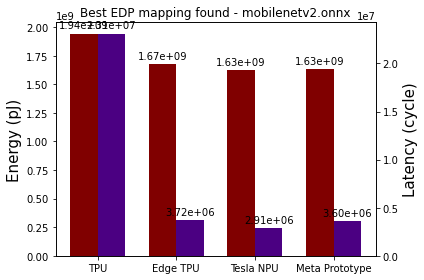

In [3]:
from zigzag.visualization.results.plot_cme import bar_plot_cost_model_evaluations_total

hardwares = ['TPU', 'Edge TPU', 'Tesla NPU', 'Meta Prototype']
bar_plot_cost_model_evaluations_total(cmes, labels=hardwares, fig_title=f"Best {opt} mapping found - {workload}", save_path="plot_total.png")